In [176]:
# Import libraries
library(dplyr)
library(readr)
library(tidyr)
library(ggplot2)
library(cowplot)

# Initial Analysis

In [98]:
# Read 'Climate_HistoricalNormals.csv' file
weatherDF <- read_csv(
    "../../data/dataverse_files/Climate_HourlyWeather.csv",
    col_types = cols(
        `Date/Time` = col_datetime(),
        Year = col_integer(),
        Month = col_integer(),
        Day = col_integer(),
        Time = col_time(),
        `Data Quality` = col_character(),
        `Temp (C)` = col_double(),
        `Temp Flag` = col_character(),
        `Dew Point Temp (C)` = col_double(),
        `Dew Point Temp Flag` = col_character(),
        `Rel Hum (%)` = col_integer(),
        `Rel Hum Flag` = col_character(),
        `Wind Dir (10s deg)` = col_integer(),
        `Wind Dir Flag` = col_character(),
        `Wind Spd (km/h)` = col_integer(),
        `Wind Spd Flag` = col_character(),
        `Visibility (km)` = col_double(),
        `Visibility Flag` = col_character(),
        `Stn Press (kPa)` = col_double(),
        `Stn Press Flag` = col_character(),
        Hmdx = col_double(), # TBD
        `Hmdx Flag` = col_character(),
        `Wind Chill` = col_integer(), # TBD
        `Wind Chill Flag` = col_character(),
        Weather = col_character()
    )
)
# Describe the file (cols name, cols type, first values, etc.)
glimpse(weatherDF)

Rows: 17,520
Columns: 25
$ `Date/Time`           <dttm> 2012-04-01 00:00:00, 2012-04-01 01:00:00, 2012-…
$ Year                  <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ Month                 <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ Day                   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Time                  <time> 00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:0…
$ `Data Quality`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Temp (C)`            <dbl> 4.3, 4.4, 3.8, 2.8, 2.4, 3.0, 3.7, 4.7, 5.3, 5.9…
$ `Temp Flag`           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Dew Point Temp (C)`  <dbl> 2.3, 2.2, 1.6, 0.7, 0.4, 0.9, 1.7, 1.3, 1.3, 1.9…
$ `Dew Point Temp Flag` <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Rel Hum (%)`         <int> 87, 86, 86, 86, 87, 86, 87, 79, 75, 75, 68, 61, …
$ `Rel Hum Flag`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Wind Dir (10

In [145]:
# Cleanup of NA values
# All NAs are replaced with the median value of their respective column
cleanWeatherDF <- weatherDF %>%
    mutate(
        `Temp (C)`              =  coalesce(`Temp (C)`, median(`Temp (C)`, na.rm = TRUE)),
        `Dew Point Temp (C)`    =  coalesce(`Dew Point Temp (C)`, median(`Dew Point Temp (C)`, na.rm = TRUE)),
        `Rel Hum (%)`           =  coalesce(`Rel Hum (%)`, median(`Rel Hum (%)`, na.rm = TRUE)),
        `Wind Dir (10s deg)`    =  coalesce(`Wind Dir (10s deg)`, median(`Wind Dir (10s deg)`, na.rm = TRUE)),
        `Wind Spd (km/h)`       =  coalesce(`Wind Spd (km/h)`, median(`Wind Spd (km/h)`, na.rm = TRUE)),
        `Visibility (km)`       =  coalesce(`Visibility (km)`, median(`Visibility (km)`, na.rm = TRUE)),
        `Stn Press (kPa)`       =  coalesce(`Stn Press (kPa)`, median(`Stn Press (kPa)`, na.rm = TRUE)),
        Hmdx                    =  coalesce(Hmdx, median(Hmdx, na.rm = TRUE)),
        `Wind Chill`            =  coalesce(`Wind Chill`, median(`Wind Chill`, na.rm = TRUE))
    )

In [147]:
glimpse(cleanWeatherDF)

Rows: 17,520
Columns: 25
$ `Date/Time`           <dttm> 2012-04-01 00:00:00, 2012-04-01 01:00:00, 2012-…
$ Year                  <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ Month                 <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ Day                   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Time                  <time> 00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:0…
$ `Data Quality`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Temp (C)`            <dbl> 4.3, 4.4, 3.8, 2.8, 2.4, 3.0, 3.7, 4.7, 5.3, 5.9…
$ `Temp Flag`           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Dew Point Temp (C)`  <dbl> 2.3, 2.2, 1.6, 0.7, 0.4, 0.9, 1.7, 1.3, 1.3, 1.9…
$ `Dew Point Temp Flag` <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Rel Hum (%)`         <dbl> 87, 86, 86, 86, 87, 86, 87, 79, 75, 75, 68, 61, …
$ `Rel Hum Flag`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Wind Dir (10

In [202]:
groupedDF <- cleanWeatherDF %>%
    mutate(Date = as.Date(`Date/Time`)) %>%
    group_by(Month) %>%
    summarise(
        avg_temp        = mean(`Temp (C)`),
        avg_dewpt_temp  = mean(`Dew Point Temp (C)`),
        avg_prct_hum    = mean(`Rel Hum (%)`),
        avg_wind_dir    = mean(`Wind Dir (10s deg)`),
        avg_wind_spd    = mean(`Wind Spd (km/h)`),
        avg_visib       = mean(`Visibility (km)`),
        avg_stn_press   = mean(`Stn Press (kPa)`),
        avg_hmdx        = mean(Hmdx),
        avg_wind_chill  = mean(`Wind Chill`)
    ) %>%
    mutate(
        Month = factor(Month)
    )

groupedDF %>%
    slice(1:25)

Month,avg_temp,avg_dewpt_temp,avg_prct_hum,avg_wind_dir,avg_wind_spd,avg_visib,avg_stn_press,avg_hmdx,avg_wind_chill
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.597782,2.15927419,90.50470,16.45430,10.33199,20.43730,102.2225,26.00000,-4.941532
2,4.002232,0.01904762,76.91369,15.86533,14.17113,24.07202,101.7623,26.00000,-5.236607
3,7.079704,3.40409946,78.19489,17.37030,14.80981,28.30927,101.6954,26.00000,-4.991935
4,9.475625,4.69493056,72.96111,18.16250,14.33264,30.15625,101.7086,26.00000,-5.000000
5,12.727285,7.05840054,69.46841,18.85215,13.49194,34.32527,101.7931,26.00000,-5.000000
6,15.104375,9.91583333,71.95139,17.95208,12.73472,32.43910,101.5514,26.04583,-5.000000
7,17.985013,12.07829301,68.97245,18.32325,13.22917,37.94402,101.6402,26.04570,-5.000000
8,18.602083,13.48427419,73.07594,17.90323,12.44153,36.09892,101.5335,26.14583,-5.000000
9,15.295417,11.87986111,80.91806,19.71458,11.97917,33.89049,101.5141,25.99792,-5.000000


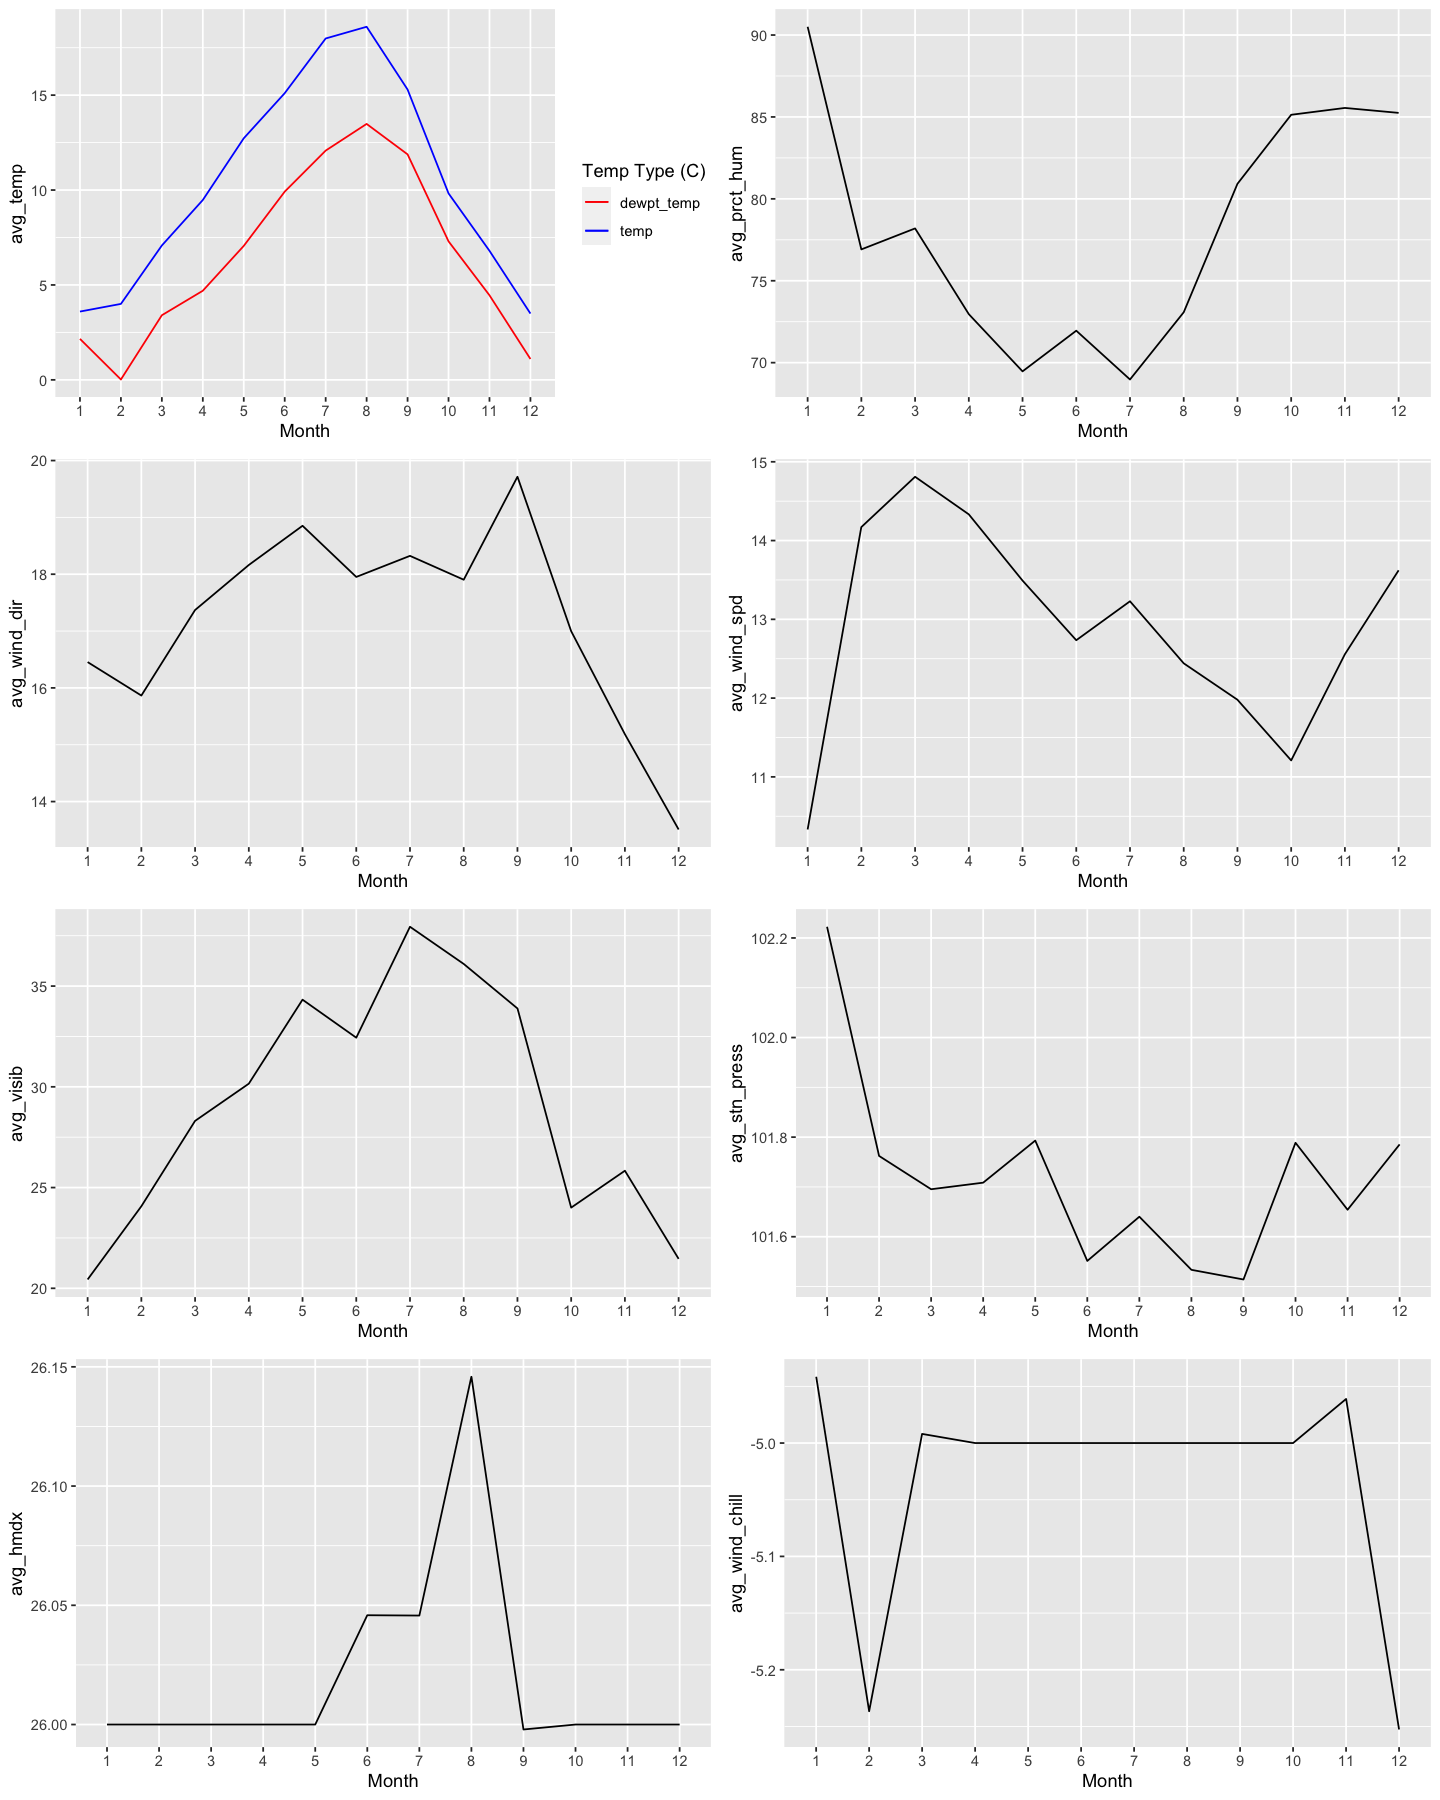

In [206]:
options(repr.plot.width = 12, repr.plot.height = 15)

plt1 <- ggplot(groupedDF, aes(group = 1)) + 
    geom_line(aes(x = Month, y = avg_temp, color = "temp")) +
    geom_line(aes(x = Month, y = avg_dewpt_temp, color = "dewpt_temp")) +
    scale_color_manual(
        name = "Temp Type (C)",
        values = c(
            "temp" = "blue", 
            "dewpt_temp" = "red"
        )
    )
plt2 <- ggplot(groupedDF, aes(x = Month, y = avg_prct_hum,      group = 1)) + geom_line()
plt3 <- ggplot(groupedDF, aes(x = Month, y = avg_wind_dir,      group = 1)) + geom_line()
plt4 <- ggplot(groupedDF, aes(x = Month, y = avg_wind_spd,      group = 1)) + geom_line()
plt5 <- ggplot(groupedDF, aes(x = Month, y = avg_visib,         group = 1)) + geom_line()
plt6 <- ggplot(groupedDF, aes(x = Month, y = avg_stn_press,     group = 1)) + geom_line()
plt7 <- ggplot(groupedDF, aes(x = Month, y = avg_hmdx,          group = 1)) + geom_line()
plt8 <- ggplot(groupedDF, aes(x = Month, y = avg_wind_chill,    group = 1)) + geom_line()

plot_grid(plt1, plt2, plt3, plt4, plt5, plt6, plt7, plt8, ncol = 2)